# Travail D

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Clustering K-means sur la BD iris

In [64]:
file = "datasets/iris.2D.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,petallength,petalwidth,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [65]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

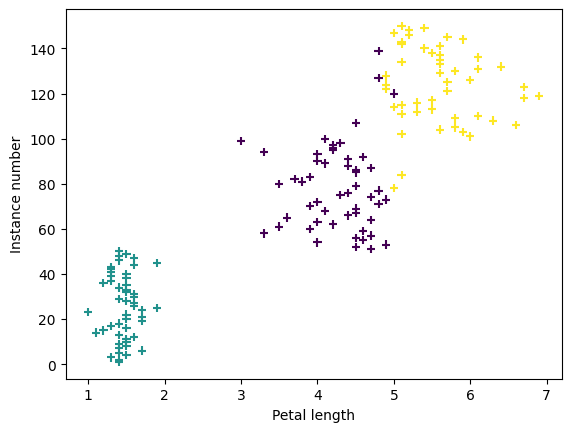

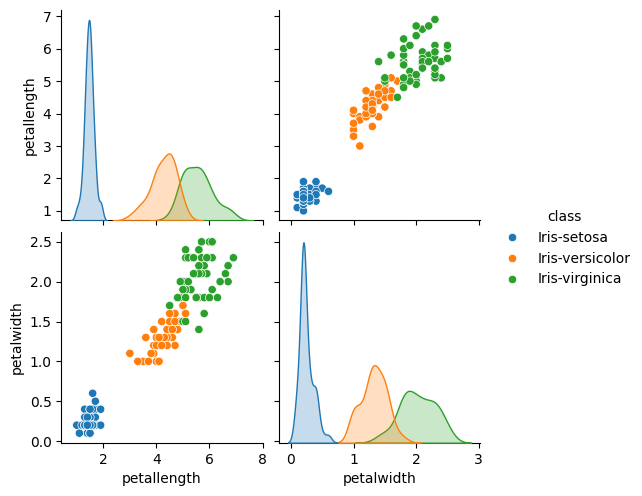

In [67]:
instance_number = list(range(1, len(X_train) + 1))

plt.scatter(X_train.iloc[:, 0], instance_number, c=kmeans.labels_, cmap='viridis', marker='+')
plt.xlabel('Petal length')
plt.ylabel('Instance number')
plt.show()

sns.pairplot(data, hue='class')

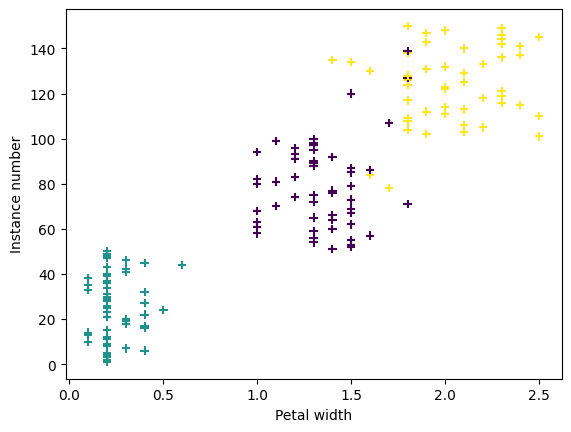

In [68]:
plt.scatter(X_train.iloc[:, 1], instance_number, c=kmeans.labels_, cmap='viridis', marker='+')
plt.xlabel('Petal width')
plt.ylabel('Instance number')
plt.show()

([<matplotlib.axis.YTick at 0x1ac764f6b70>,
 [Text(0, 0, 'Iris-setosa'),
  Text(0, 1, 'Iris-versicolor'),
  Text(0, 2, 'Iris-virginica')])

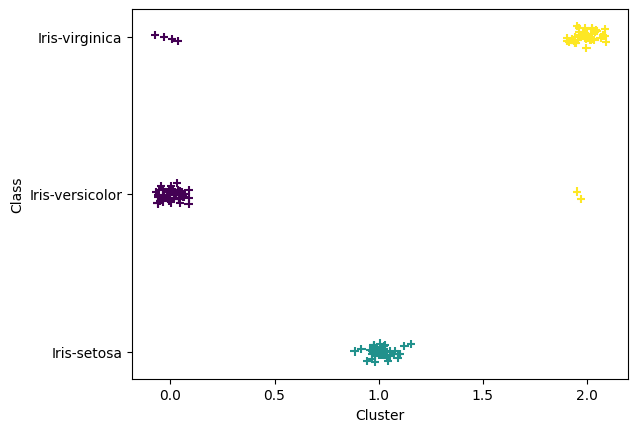

In [69]:
cluster_jitter = kmeans.labels_ + np.random.normal(0, 0.05, len(kmeans.labels_))
y_temp = y_train.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))



plt.scatter(cluster_jitter, y_jitter, c=kmeans.labels_, cmap='viridis', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

La séparation entre les deux clusters est bien plus visible au niveau de "Petal width" 

In [70]:
file = "datasets/iris.arff"

arff_file = arff.loadarff(file)
data = pd.DataFrame(arff_file[0])

data = data.map(lambda x: x.decode() if isinstance(x, bytes) else x)
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [71]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=42)

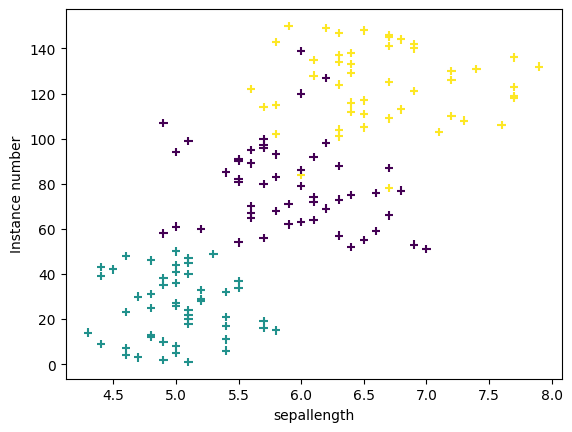

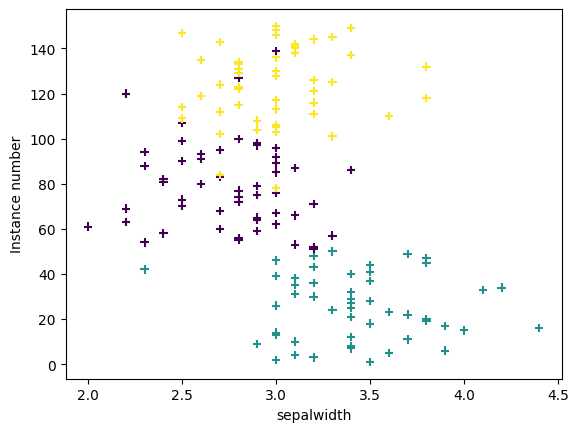

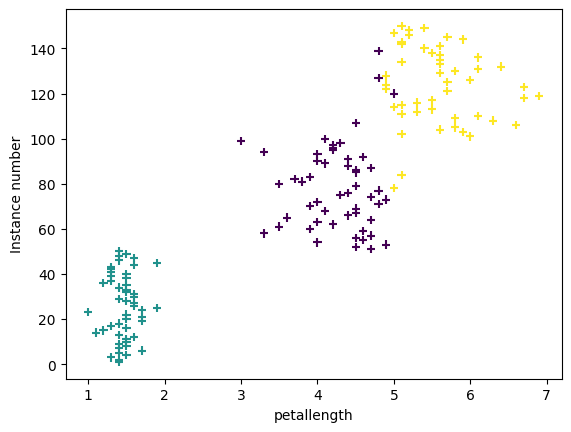

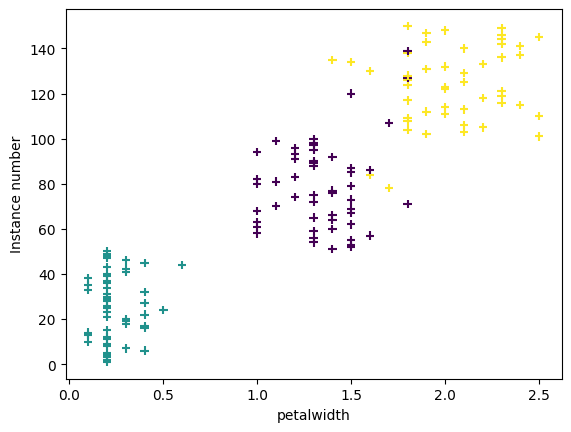

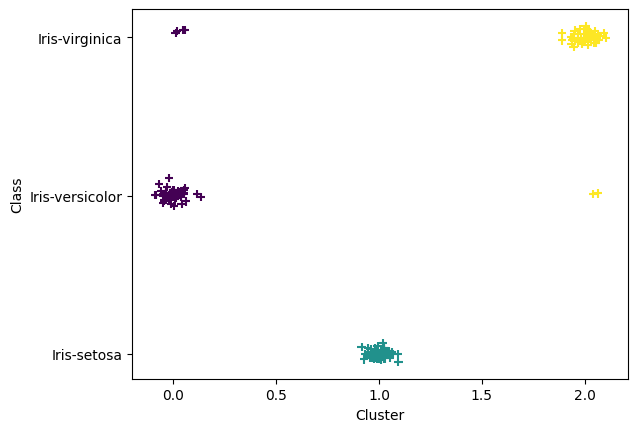

In [72]:
for attribute in X.columns:
    plt.scatter(X[attribute], instance_number, c=kmeans.labels_, cmap='viridis', marker='+')
    plt.xlabel(attribute)
    plt.ylabel('Instance number')
    plt.show()

cluster_jitter = kmeans.labels_ + np.random.normal(0, 0.05, len(kmeans.labels_))
y_temp = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))

plt.scatter(cluster_jitter, y_jitter, c=kmeans.labels_, cmap='viridis', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

## Clustering EM sur la BD iris

### Exercice XXXIV

L'objet GaussianMixture de Sklearn permet de faire la méthode Expectation-maximization : https://scikit-learn.org/1.5/modules/mixture.html#gaussian-mixture

In [73]:
from sklearn.mixture import GaussianMixture

EM = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
EM.fit(X)

log_likelihood = EM.score(X)
log_likelihood

np.float64(-1.4344404640361719)

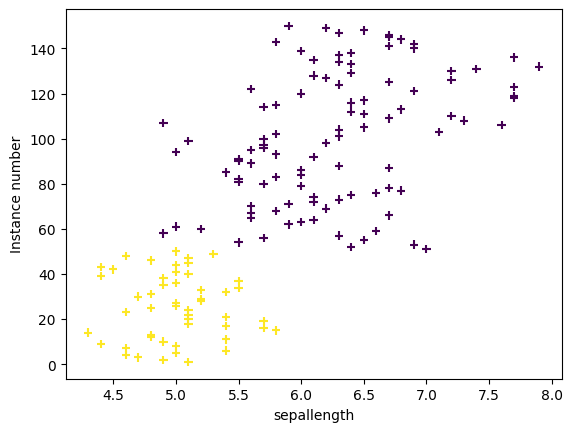

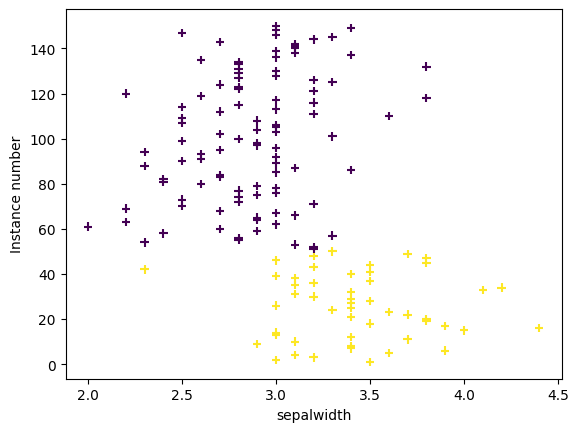

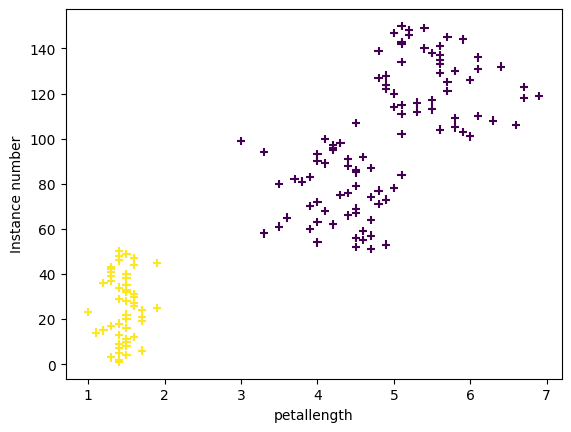

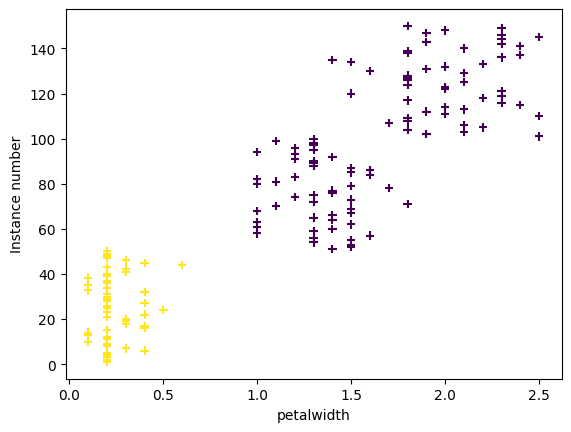

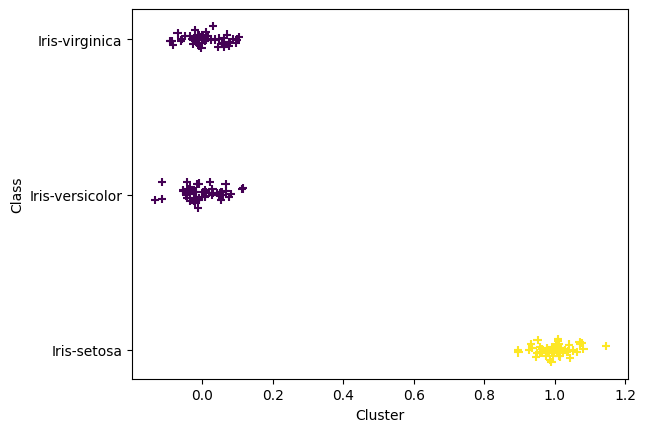

In [74]:
predicted_class = EM.predict(X)

for attribute in X.columns:
    plt.scatter(X[attribute], instance_number, c=predicted_class, cmap='viridis', marker='+')
    plt.xlabel(attribute)
    plt.ylabel('Instance number')
    plt.show()

cluster_jitter = predicted_class + np.random.normal(0, 0.05, len(kmeans.labels_))
y_temp = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))

plt.scatter(cluster_jitter, y_jitter, c=predicted_class, cmap='viridis', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [75]:
EM = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
EM.fit(X)

log_likelihood = EM.score(X)
log_likelihood

np.float64(-1.2067209604272198)

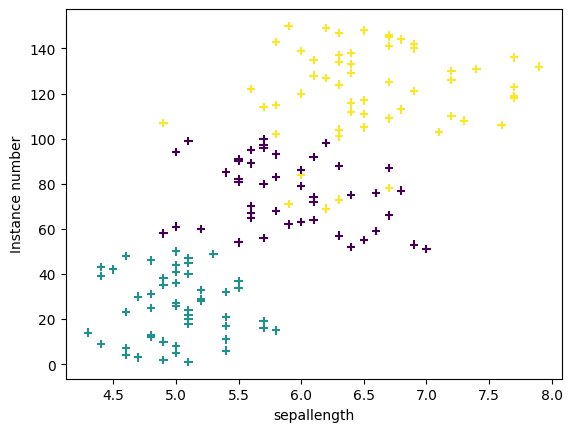

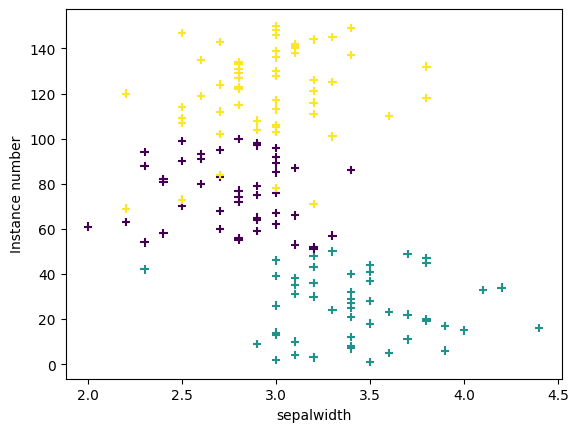

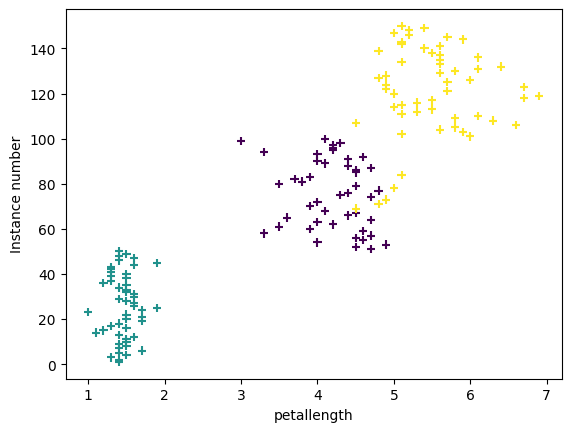

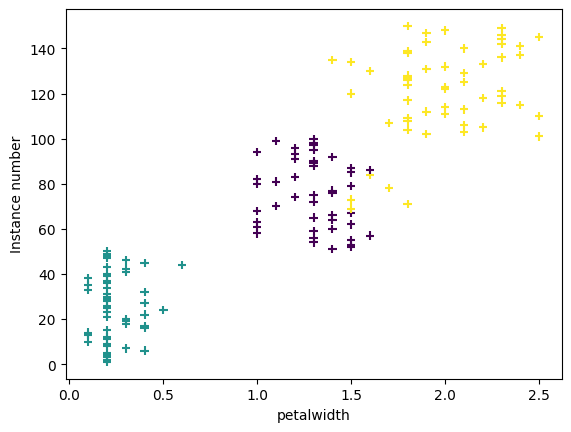

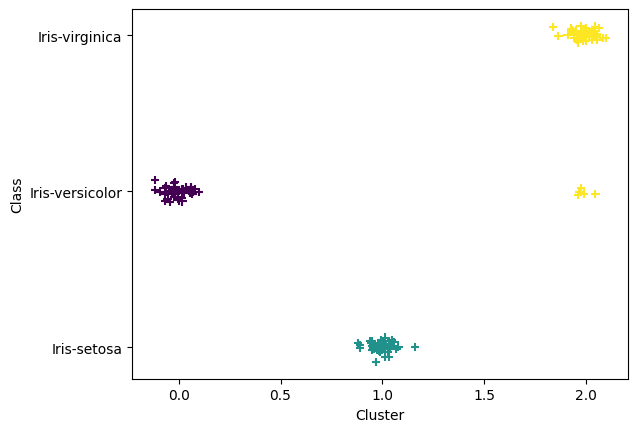

In [76]:
predicted_class = EM.predict(X)

for attribute in X.columns:
    plt.scatter(X[attribute], instance_number, c=predicted_class, cmap='viridis', marker='+')
    plt.xlabel(attribute)
    plt.ylabel('Instance number')
    plt.show()

cluster_jitter = predicted_class + np.random.normal(0, 0.05, len(kmeans.labels_))
y_temp = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))

plt.scatter(cluster_jitter, y_jitter, c=predicted_class, cmap='viridis', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

## Test avec BD séparée

### Exercice XXXV

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

EM = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
EM.fit(X_train)

GaussianMixture(n_components=3, random_state=42)

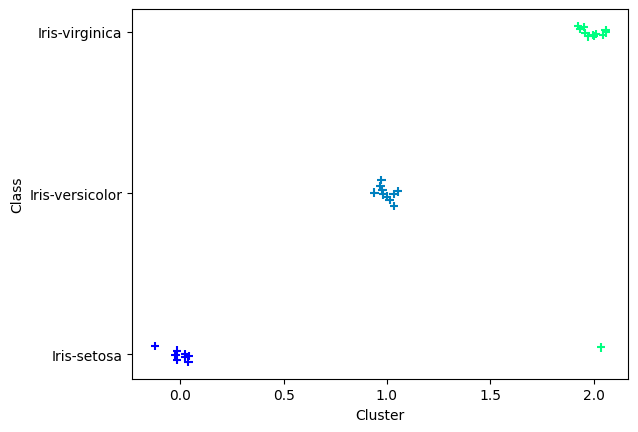

In [80]:
y_pred = EM.predict(X_test)

cluster_jitter = y_pred + np.random.normal(0, 0.05, len(y_pred))
y_temp = y_test.map({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))

plt.scatter(cluster_jitter, y_jitter, c=y_pred, cmap='winter', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [81]:
from eval_method import eval_method

print("log likelyhood :", EM.score(X_test))
y_pred = EM.predict(X_test)
y_test_2 = y_test.map({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2})
eval_method(y_test_2, y_pred);

log likelyhood : -1.6812937004749808
Accuracy :  0.9666666666666667
ROC AUC Score :  0.9727095516569201
Kappa :  0.9496644295302014
Confusion Matrix :
 [[ 8  0  1]
 [ 0 10  0]
 [ 0  0 11]]


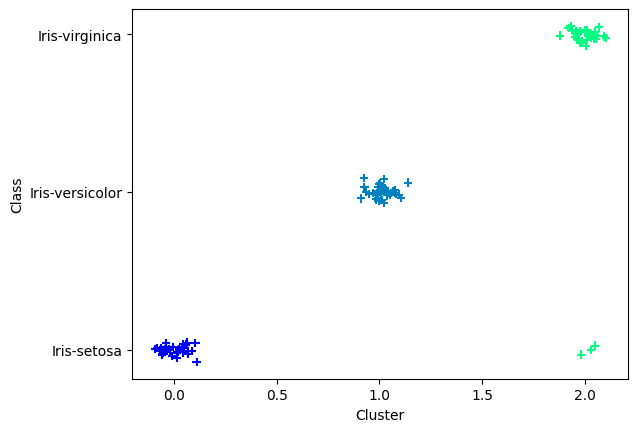

In [83]:
y_pred = EM.predict(X_train)

cluster_jitter = y_pred + np.random.normal(0, 0.05, len(y_pred))
y_temp = y_train.map({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2})
y_jitter = y_temp + np.random.normal(0, 0.03, len(y_temp))

plt.scatter(cluster_jitter, y_jitter, c=y_pred, cmap='winter', marker='+')
plt.xlabel('Cluster')
plt.ylabel('Class')
plt.yticks([0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [86]:
from eval_method import eval_method

print("log likelyhood :", EM.score(X_train))
y_pred = EM.predict(X_train)
y_train_2 = y_train.map({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 2})
eval_method(y_train_2, y_pred);

log likelyhood : -1.1436548507262339
Accuracy :  0.975
ROC AUC Score :  0.9816320385426076
Kappa :  0.9625156184922948
Confusion Matrix :
 [[38  0  3]
 [ 0 40  0]
 [ 0  0 39]]


Comme on peut s'y attendre, on a de meilleurs résultats sur la base de données d'entrainement. On peut cependant noter qu l'écart n'est pas significatif, il n'y a pas donc de surapprentissage.